In [2]:
import pyart
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import warnings
warnings.filterwarnings("ignore")
import nexradaws
import tempfile
import os
import shutil
from datetime import datetime, timedelta
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import metpy.calc as mpcalc
import metpy.plots as mpplots
from matplotlib.patheffects import withStroke
from metpy.io import parse_metar_file
from metpy.units import pandas_dataframe_to_unit_arrays
# Here is where we import the TDSCatalog class from siphon for obtaining our data 
from siphon.catalog import TDSCatalog
import pytz
import pathlib

In [38]:
radar_name = ["KNQA", "KPAH", "KSHV"]

In [39]:
pathlib.Path("/Users/syed44/Downloads/Project/PERiLS/obsdata/2022/NEXRAD/IOP1/20220322/"+radar_name).mkdir(parents=True, exist_ok=True)

In [40]:
# define data directory
data_dir = "/Users/syed44/Downloads/Project/PERiLS/obsdata/2022/NEXRAD/IOP1/20220322/"+radar_name
# Create a tempory file, connect nexrad aws and request a list of files for the Perils campaign
templocation = tempfile.mkdtemp()
conn = nexradaws.NexradAwsInterface()
scans = conn.get_avail_scans(2022, 3, 22,radar_name)
print(len(scans))

334


In [41]:
lcn = templocation
localfiles = conn.download(scans,lcn)

Downloaded KLZK20220322_002441_V06
Downloaded KLZK20220322_000435_V06
Downloaded KLZK20220322_000943_V06
Downloaded KLZK20220322_001456_V06
Downloaded KLZK20220322_001956_V06
Downloaded KLZK20220322_003820_V06
Downloaded KLZK20220322_003345_V06
Downloaded KLZK20220322_004259_V06
Downloaded KLZK20220322_002910_V06
Downloaded KLZK20220322_005643_V06_MDM
Downloaded KLZK20220322_004738_V06
Downloaded KLZK20220322_005207_V06
Downloaded KLZK20220322_011030_V06
Downloaded KLZK20220322_005643_V06
Downloaded KLZK20220322_010119_V06
Downloaded KLZK20220322_013251_V06
Downloaded KLZK20220322_010555_V06
Downloaded KLZK20220322_012359_V06
Downloaded KLZK20220322_011506_V06
Downloaded KLZK20220322_012815_V06
Downloaded KLZK20220322_011942_V06
Downloaded KLZK20220322_015615_V06_MDM
Downloaded KLZK20220322_014156_V06
Downloaded KLZK20220322_013727_V06
Downloaded KLZK20220322_015132_V06
Downloaded KLZK20220322_020604_V06
Downloaded KLZK20220322_014648_V06
Downloaded KLZK20220322_015615_V06
Downloaded K

In [42]:
fpath = []
for file in range(0,len(scans)):
    if localfiles.success[file].filepath.endswith("MDM"):
        continue
    fpath.append(localfiles.success[file].filepath)
    # print(localfiles.success[file].filepath)

In [43]:
for file in fpath:
    radar = pyart.io.read(file)
    pyart.io.write_cfradial(data_dir+"/"+file.split("/")[-1]+'.nc',radar)
print("done")

done


In [3]:
radar = pyart.io.read("IOP2/KPOE/KPOE20220330_000347_V06.nc")

In [4]:
display = pyart.graph.RadarMapDisplay(radar)

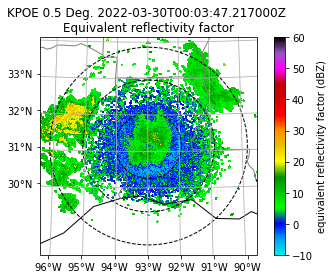

In [10]:
display.plot_ppi_map("reflectivity",cmap='pyart_NWSRef', vmin=-10, vmax=60,)
display.plot_range_rings([100,200,300],lw=1,ls='--')